# TB04 Test 

In [214]:
%run ./Functions_PM.ipynb

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

x_1 = np.array([0., 1000.])
x_2 = np.array([0., -200.])
v_1 = np.array([0.005, 0.])
v_2 = np.array([-0.01, 0.])
a_1 = np.array([0.,    0.])
a_2 = np.array([0.,    0.])
m_1 = 10
m_2 = 15

s = x_1, x_2, v_1, v_2, m_1, m_2

t_max = 1e7
res = 1e5
dt = t_max/res

positionsN = run_modelN(s, t_max = t_max, dt = dt, DL = True)
positions, momenta = run_model(s, t_max = t_max, dt = dt, DL = True, return_momenta=True)



Code interrupted: Radial Dip
Code interrupted: Radial Dip


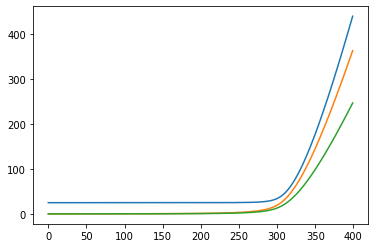

In [218]:
t = range(int(res))
S = slice(0, int(400))

fig, ax = plt.subplots()
# ax.set_aspect('equal')
ax.plot(t[S], momenta[0,0,S]+momenta[1,0,S])
ax.plot(t[S], np.abs(momenta[0,1,S]+momenta[1,1,S]))
ax.plot(t[S], np.abs(momenta[0,2,S]+momenta[1,2,S]))


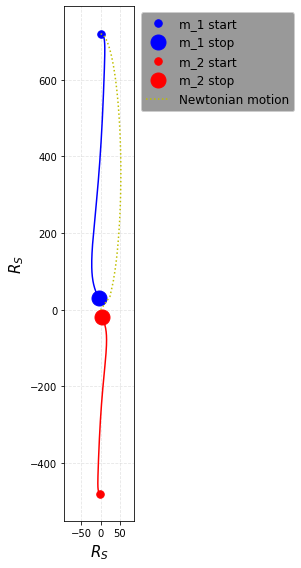

In [217]:
%run ./Functions_PM.ipynb

M = slice(0, -1, 1)
# orbPlotter(positions, positionsN, slice = M)

# lim = 1e-2
# lims = (-lim, lim)
lims = 0.1
orbPlotter(positions, positionsN, slice = S, xlim=lims, ylim=lims, DL = True)

# Earth-Sun stuffs

In [21]:
%run ./Functions_PM.ipynb

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value



In [22]:
Ns = []
PMs = []
for i in range(4):
    m_1 = M_earth
    m_2 = M_sun
    v_1 = rotate(np.array([0.,   29.29e3]), -np.pi*(1+i/7))
    v_2 = np.array([0.,         0])

    P_1 = four_P(three_p(v_1, m_1, DL = False), m_1, DL = False)
    P_2 = four_P(three_p(v_2, m_2, DL = False), m_2, DL = False)

    R_S1 = 2*P_1[0]*G/c**2
    R_S2 = 2*P_1[0]*G/c**2
    R_S = 2*(P_1[0] + P_2[0])*G/c**2

    x_1 = np.array([-152.100e9, 0.])
    x_1 = np.array([0.,         0.])
    
    

    s = x_1, x_2, v_1, v_2, m_1, m_2
    t_max = 1e8/3
    res = 5e4
    dt = t_max/res
    Ns.append(run_modelN(s, t_max = t_max, dt = dt))
    PMs.append(run_model(s, t_max = t_max, dt = dt))

# t_max = 1e8/3
# dt = t_max/5e4
#~5 min STABILIZED

5.961120730589241e+38
5.961120730589241e+38
5.961120730589241e+38
5.961120730589241e+38


51502580.52265834

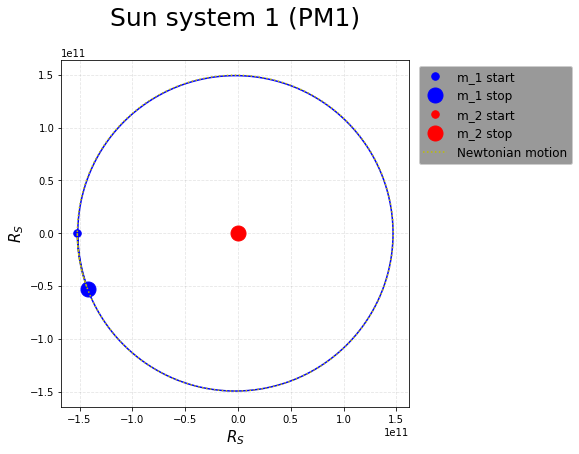

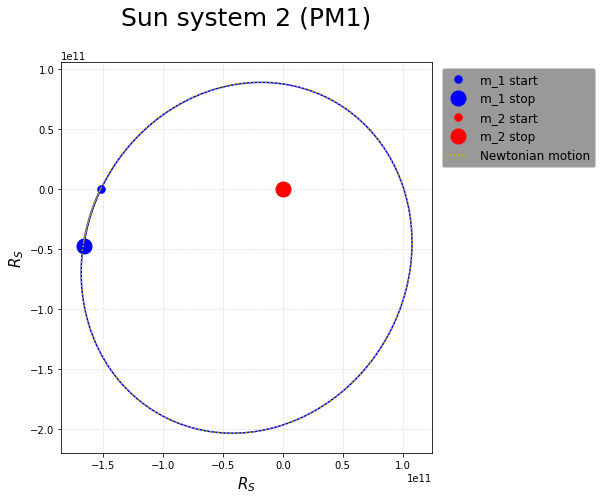

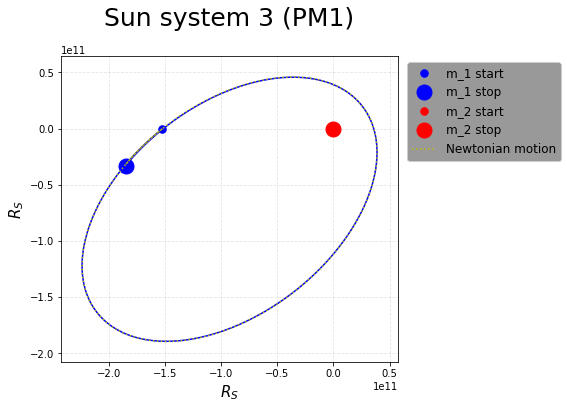

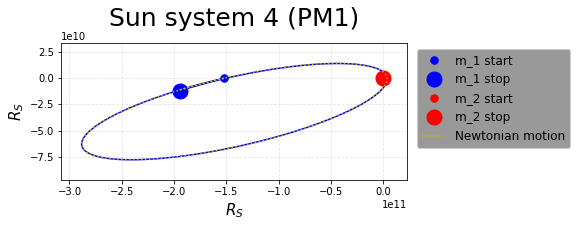

In [28]:
%run ./Functions_PM.ipynb
for i in range(4):
    orbPlotter(PMs[i], Ns[i], slice = M, filename = f'Sun system {1+i} (PM1)', DL = True)